In [3]:
#Logistic Regression and other Classifiers using F1 Data Set - Deepak Verma (2019)
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from datetime import date
from datetime import datetime as dt
%matplotlib inline
sns.set()

In [4]:
results_logr = pd.read_csv('results_logr.csv')

In [6]:
# #Create a dataframe for input into Logistic Regression  & Rename Columns to something more meaningful
results_logr.columns = ['GridStart', 'TotalLaps', 'FastestLapTime', 'FastestLapSpeed', 'Driver', 'Circuit', 'Constructor', 'QualifyPos', 'NumPitStops', 
                    'LastPitStopLap', 'PitStopTime', 'Weather', 'SaftetyCarLaps', 'DriverAge', 'PointsFinish']
results_logr.shape

(2768, 15)

In [7]:
results_logr['PointsFinish'].value_counts()

N    1408
P    1360
Name: PointsFinish, dtype: int64

In [8]:
# Ignoring Driver, focus on COnstructor
results_logr_dummy1 = pd.get_dummies(results_logr, columns = ['Circuit', 'Constructor', 'Weather'])

In [9]:
results_logr_dummy1.head()

,GridStart,TotalLaps,FastestLapTime,FastestLapSpeed,Driver,QualifyPos,NumPitStops,LastPitStopLap,PitStopTime,SaftetyCarLaps,...,Constructor_mercedes,Constructor_red_bull,Constructor_renault,Constructor_sauber,Constructor_toro_rosso,Constructor_virgin,Constructor_williams,Weather_Dry,Weather_Varied,Weather_Wet
0,0,2,58,01:30.3,211.382,2.0,2,36,23199,0,...,0,0,0,0,0,0,0,1,0,0
1,1,4,58,01:29.9,212.396,4.0,3,37,22681,0,...,0,0,0,0,0,0,0,1,0,0
2,2,17,48,01:31.4,208.861,17.0,4,40,26309,0,...,0,0,0,0,0,0,1,1,0,0
3,3,18,57,01:32.4,206.661,18.0,2,30,25098,0,...,0,0,1,0,0,0,0,1,0,0
4,4,6,58,01:30.1,211.969,6.0,2,36,25683,0,...,0,0,1,0,0,0,0,1,0,0


In [11]:
features = list(results_logr_dummy1)
features.remove('Driver')
features.remove('PointsFinish')
X = results_logr_dummy1[features]
y = results_logr_dummy1['PointsFinish']

In [12]:
features

['GridStart',
 'TotalLaps',
 'FastestLapTime',
 'FastestLapSpeed',
 'QualifyPos',
 'NumPitStops',
 'LastPitStopLap',
 'PitStopTime',
 'SaftetyCarLaps',
 'DriverAge',
 'Circuit_BAK',
 'Circuit_albert_park',
 'Circuit_americas',
 'Circuit_bahrain',
 'Circuit_buddh',
 'Circuit_catalunya',
 'Circuit_hockenheimring',
 'Circuit_hungaroring',
 'Circuit_interlagos',
 'Circuit_istanbul',
 'Circuit_marina_bay',
 'Circuit_monaco',
 'Circuit_monza',
 'Circuit_nurburgring',
 'Circuit_red_bull_ring',
 'Circuit_rodriguez',
 'Circuit_sepang',
 'Circuit_shanghai',
 'Circuit_silverstone',
 'Circuit_sochi',
 'Circuit_spa',
 'Circuit_suzuka',
 'Circuit_valencia',
 'Circuit_villeneuve',
 'Circuit_yas_marina',
 'Circuit_yeongam',
 'Constructor_caterham',
 'Constructor_ferrari',
 'Constructor_force_india',
 'Constructor_haas',
 'Constructor_hrt',
 'Constructor_lotus_f1',
 'Constructor_lotus_racing',
 'Constructor_manor',
 'Constructor_marussia',
 'Constructor_mclaren',
 'Constructor_mercedes',
 'Constructor_

In [13]:
#Import sklearn  ML tools
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [18]:
#Split the Sample as 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Selection Using Recursive Feature Selection
fit_lr_model = LogisticRegression(solver='lbfgs', max_iter=10000)
rfe = RFE(fit_lr_model, 3)
fit_lr = rfe.fit(X,y)
print("Num Features: %s" % (fit_lr.n_features_))
print("Selected Features: %s" % (fit_lr.support_))
print("Feature Ranking: %s" % (fit_lr.ranking_))

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False  True False False False  True False False False
 False False False False False False False False]
Feature Ranking: [35 32 39 41 51 17 52 54 50 53 15 13 49 37 46 21 26 28 22 33 38 24 27 42
 20 31 44 36 45 30 18 29 47 25 43 48  1  5  8 23  1  9  3  2  1 10  7  6
 34 14 12  4 11 19 40 16]


In [21]:
# Use Logistic Regression - using Default Solver and LBfgs with 7000 iteration (no convergence 6000 and below)
#lr_model=LogisticRegression()
lr_model=LogisticRegression(solver='lbfgs', max_iter=7000)
lr_model.fit(X_train, y_train)
lr_y_predict = lr_model.predict(X_test)

Results for Logistic Regression:
Prediction Accuracy: 0.8686131386861314
Confusion Matrix: 
 [[232  39]
 [ 33 244]]
Classification Report: 
               precision    recall  f1-score   support

           N       0.88      0.86      0.87       271
           P       0.86      0.88      0.87       277

   micro avg       0.87      0.87      0.87       548
   macro avg       0.87      0.87      0.87       548
weighted avg       0.87      0.87      0.87       548



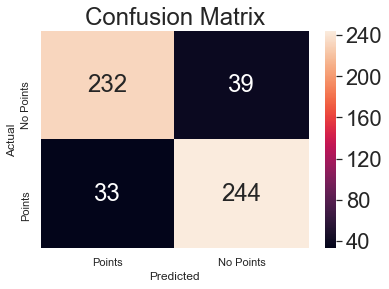

In [22]:
#Results for Logistic Regression
print('Results for Logistic Regression:')
print('Prediction Accuracy:', accuracy_score(y_test, lr_y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test, lr_y_predict))
print('Classification Report: \n', classification_report(y_test, lr_y_predict))
conf_mat = confusion_matrix(y_test, lr_y_predict)
ax= plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

In [29]:
# Using MLP Classifier
#mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_model.fit(X_train, y_train)
mlp_y_predict = mlp_model.predict(X_test)

Iteration 1, loss = 4.62573014
Iteration 2, loss = 0.61924762
Iteration 3, loss = 0.62705024
Iteration 4, loss = 0.59007165
Iteration 5, loss = 0.47897696
Iteration 6, loss = 0.45713516
Iteration 7, loss = 0.43728492
Iteration 8, loss = 0.43385243
Iteration 9, loss = 0.49374137
Iteration 10, loss = 0.42223900
Iteration 11, loss = 0.44436419
Iteration 12, loss = 0.42528947
Iteration 13, loss = 0.42632325
Iteration 14, loss = 0.41941511
Iteration 15, loss = 0.43104767
Iteration 16, loss = 0.41049996
Iteration 17, loss = 0.40748551
Iteration 18, loss = 0.42671981
Iteration 19, loss = 0.41231543
Iteration 20, loss = 0.40391992
Iteration 21, loss = 0.41223455
Iteration 22, loss = 0.42505451
Iteration 23, loss = 0.40541172
Iteration 24, loss = 0.43109202
Iteration 25, loss = 0.40556489
Iteration 26, loss = 0.40604955
Iteration 27, loss = 0.41190519
Iteration 28, loss = 0.39895662
Iteration 29, loss = 0.41544695
Iteration 30, loss = 0.40188175
Iteration 31, loss = 0.41256793
Iteration 32, los

Results for MLP:
Prediction Accuracy: 0.8156934306569343
Confusion Matrix: 
 [[233  38]
 [ 63 214]]
Classification Report: 
               precision    recall  f1-score   support

           N       0.79      0.86      0.82       271
           P       0.85      0.77      0.81       277

   micro avg       0.82      0.82      0.82       548
   macro avg       0.82      0.82      0.82       548
weighted avg       0.82      0.82      0.82       548



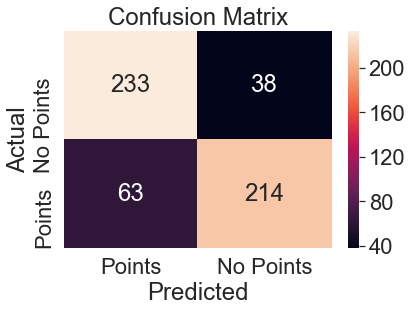

In [30]:
# Results for MLP Classifier - Neural Network
print('Results for MLP:')
print('Prediction Accuracy:', accuracy_score(y_test, mlp_y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test, mlp_y_predict))
print('Classification Report: \n', classification_report(y_test, mlp_y_predict))
conf_mat = confusion_matrix(y_test, mlp_y_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

In [31]:
#Run 2 - Remove Constructor and Add Driver into Features
results_logr_dummy2 = pd.get_dummies(results_logr, columns = ['Circuit', 'Driver', 'Weather'])

In [32]:
results_logr_dummy2.head()

,GridStart,TotalLaps,FastestLapTime,FastestLapSpeed,Constructor,QualifyPos,NumPitStops,LastPitStopLap,PitStopTime,SaftetyCarLaps,...,Driver_sutil,Driver_trulli,Driver_vandoorne,Driver_vergne,Driver_vettel,Driver_webber,Driver_wehrlein,Weather_Dry,Weather_Varied,Weather_Wet
0,2,58,90.3,211.382,mclaren,2,2,36,23.199,0,...,0,0,0,0,0,0,0,1,0,0
1,4,58,89.9,212.396,mclaren,4,3,37,22.681,0,...,0,0,0,0,0,0,0,1,0,0
2,17,48,91.4,208.861,williams,17,4,40,26.309,0,...,0,0,0,0,0,0,0,1,0,0
3,18,57,92.4,206.661,renault,18,2,30,25.098,0,...,0,0,0,0,0,0,0,1,0,0
4,6,58,90.1,211.969,renault,6,2,36,25.683,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
features2 = list(results_logr_dummy2)
features2.remove('Constructor')
features2.remove('PointsFinish')
X2 = results_logr_dummy2[features2]
y2 = results_logr_dummy2['PointsFinish']

In [34]:
features2

['GridStart',
 'TotalLaps',
 'FastestLapTime',
 'FastestLapSpeed',
 'QualifyPos',
 'NumPitStops',
 'LastPitStopLap',
 'PitStopTime',
 'SaftetyCarLaps',
 'DriverAge',
 'Circuit_BAK',
 'Circuit_albert_park',
 'Circuit_americas',
 'Circuit_bahrain',
 'Circuit_buddh',
 'Circuit_catalunya',
 'Circuit_hockenheimring',
 'Circuit_hungaroring',
 'Circuit_interlagos',
 'Circuit_istanbul',
 'Circuit_marina_bay',
 'Circuit_monaco',
 'Circuit_monza',
 'Circuit_nurburgring',
 'Circuit_red_bull_ring',
 'Circuit_rodriguez',
 'Circuit_sepang',
 'Circuit_shanghai',
 'Circuit_silverstone',
 'Circuit_sochi',
 'Circuit_spa',
 'Circuit_suzuka',
 'Circuit_valencia',
 'Circuit_villeneuve',
 'Circuit_yas_marina',
 'Circuit_yeongam',
 'Driver_alguersuari',
 'Driver_alonso',
 'Driver_ambrosio',
 'Driver_barrichello',
 'Driver_bottas',
 'Driver_brendon_hartley',
 'Driver_bruno_senna',
 'Driver_buemi',
 'Driver_button',
 'Driver_chandhok',
 'Driver_chilton',
 'Driver_ericsson',
 'Driver_garde',
 'Driver_gasly',
 '

In [35]:
#Split the Sample as 80% training, 20% test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [36]:
# Feature Selection Using Recursive Feature Selection
fit_lr_model = LogisticRegression(solver='liblinear')#solver='lbfgs', max_iter=10000)
rfe = RFE(fit_lr_model, 3)
fit_lr = rfe.fit(X2,y2)
print("Num Features: %s" % (fit_lr.n_features_))
print("Selected Features: %s" % (fit_lr.support_))
print("Feature Ranking: %s" % (fit_lr.ranking_))

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False  True False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False]
Feature Ranking: [55 81 88 90 89 60 91 93 87 84 48 47 73 76 64 63 77 71 58 62 66 65 80 92
 61 67 59 70 72 69 52 74 82 78 79 75 46 24 11 31 25 38 44 43 26 85  3  7
 10 32 45  2 40  1  8 18 35 28 15  6  5 68 53  1 83 14 34 23 22 17 57 36
 29 27 37  1 19 41 30  9 21 33 39 13 51 86 12 42 56  4 20 16 49 50 54]


Results for Logistic Regression:
Prediction Accuracy: 0.8576642335766423
Confusion Matrix: 
 [[229  42]
 [ 36 241]]
Classification Report: 
               precision    recall  f1-score   support

           N       0.86      0.85      0.85       271
           P       0.85      0.87      0.86       277

   micro avg       0.86      0.86      0.86       548
   macro avg       0.86      0.86      0.86       548
weighted avg       0.86      0.86      0.86       548



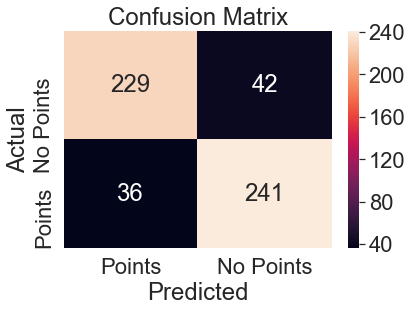

In [37]:
# Use Logistic Regression - using Default Solver and LBfgs with 7000 iteration (no convergence 6000 and below)
#lr_model=LogisticRegression()
lr_model=LogisticRegression(solver='lbfgs', max_iter=7000)
lr_model.fit(X2_train, y2_train)
lr_y2_predict = lr_model.predict(X2_test)
#Results for Logistic Regression
print('Results for Logistic Regression:')
print('Prediction Accuracy:', accuracy_score(y2_test, lr_y2_predict))
print('Confusion Matrix: \n', confusion_matrix(y2_test, lr_y2_predict))
print('Classification Report: \n', classification_report(y2_test, lr_y2_predict))
conf_mat = confusion_matrix(y2_test, lr_y2_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

Iteration 1, loss = 2.90764277
Iteration 2, loss = 0.56117877
Iteration 3, loss = 0.49327480
Iteration 4, loss = 0.47626133
Iteration 5, loss = 0.46406356
Iteration 6, loss = 0.48155355
Iteration 7, loss = 0.51790282
Iteration 8, loss = 0.42159811
Iteration 9, loss = 0.43992304
Iteration 10, loss = 0.42613389
Iteration 11, loss = 0.47240935
Iteration 12, loss = 0.45958681
Iteration 13, loss = 0.41588273
Iteration 14, loss = 0.41350857
Iteration 15, loss = 0.42119925
Iteration 16, loss = 0.41719877
Iteration 17, loss = 0.41624604
Iteration 18, loss = 0.41343501
Iteration 19, loss = 0.41976961
Iteration 20, loss = 0.40242856
Iteration 21, loss = 0.40959956
Iteration 22, loss = 0.42201927
Iteration 23, loss = 0.41203848
Iteration 24, loss = 0.42094608
Iteration 25, loss = 0.41793853
Iteration 26, loss = 0.41858257
Iteration 27, loss = 0.41455318
Iteration 28, loss = 0.41760909
Iteration 29, loss = 0.40754125
Iteration 30, loss = 0.41397367
Iteration 31, loss = 0.43757127
Training loss did

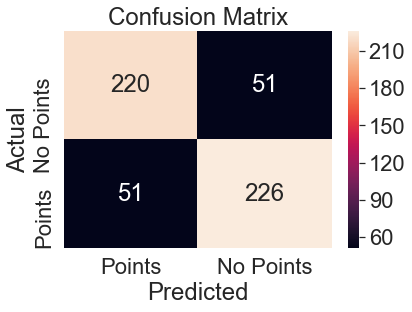

In [41]:
# Using MLP Classifier
#mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_model.fit(X2_train, y2_train)
mlp_y2_predict = mlp_model.predict(X2_test)
# Results for MLP Classifier - Neural Network
print('Results for MLP:')
print('Prediction Accuracy:', accuracy_score(y2_test, mlp_y2_predict))
print('Confusion Matrix: \n', confusion_matrix(y2_test, mlp_y2_predict))
print('Classification Report: \n', classification_report(y2_test, mlp_y2_predict))
conf_mat = confusion_matrix(y2_test, mlp_y2_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

In [42]:
#Run 3 -  Remove Constructor and Driver from Features
results_logr_dummy3 = pd.get_dummies(results_logr, columns = (['Circuit', 'Weather']))
results_logr_dummy3.head()

,GridStart,TotalLaps,FastestLapTime,FastestLapSpeed,Driver,Constructor,QualifyPos,NumPitStops,LastPitStopLap,PitStopTime,...,Circuit_sochi,Circuit_spa,Circuit_suzuka,Circuit_valencia,Circuit_villeneuve,Circuit_yas_marina,Circuit_yeongam,Weather_Dry,Weather_Varied,Weather_Wet
0,2,58,90.3,211.382,hamilton,mclaren,2,2,36,23.199,...,0,0,0,0,0,0,0,1,0,0
1,4,58,89.9,212.396,button,mclaren,4,3,37,22.681,...,0,0,0,0,0,0,0,1,0,0
2,17,48,91.4,208.861,barrichello,williams,17,4,40,26.309,...,0,0,0,0,0,0,0,1,0,0
3,18,57,92.4,206.661,heidfeld,renault,18,2,30,25.098,...,0,0,0,0,0,0,0,1,0,0
4,6,58,90.1,211.969,petrov,renault,6,2,36,25.683,...,0,0,0,0,0,0,0,1,0,0


In [43]:
features3 = list(results_logr_dummy3)
features3.remove('Driver')
features3.remove('Constructor')
features3.remove('PointsFinish')
X3 = results_logr_dummy3[features3]
y3 = results_logr_dummy3['PointsFinish']
features3

['GridStart',
 'TotalLaps',
 'FastestLapTime',
 'FastestLapSpeed',
 'QualifyPos',
 'NumPitStops',
 'LastPitStopLap',
 'PitStopTime',
 'SaftetyCarLaps',
 'DriverAge',
 'Circuit_BAK',
 'Circuit_albert_park',
 'Circuit_americas',
 'Circuit_bahrain',
 'Circuit_buddh',
 'Circuit_catalunya',
 'Circuit_hockenheimring',
 'Circuit_hungaroring',
 'Circuit_interlagos',
 'Circuit_istanbul',
 'Circuit_marina_bay',
 'Circuit_monaco',
 'Circuit_monza',
 'Circuit_nurburgring',
 'Circuit_red_bull_ring',
 'Circuit_rodriguez',
 'Circuit_sepang',
 'Circuit_shanghai',
 'Circuit_silverstone',
 'Circuit_sochi',
 'Circuit_spa',
 'Circuit_suzuka',
 'Circuit_valencia',
 'Circuit_villeneuve',
 'Circuit_yas_marina',
 'Circuit_yeongam',
 'Weather_Dry',
 'Weather_Varied',
 'Weather_Wet']

In [44]:
#Split the Sample as 80% training, 20% test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [45]:
# Feature Selection Using Recursive Feature Selection
fit_lr_model = LogisticRegression(solver='lbfgs', max_iter=8000) #solver='liblinear')#
rfe = RFE(fit_lr_model, 3)
fit_lr = rfe.fit(X3,y3)
print("Num Features: %s" % (fit_lr.n_features_))
print("Selected Features: %s" % (fit_lr.support_))
print("Feature Ranking: %s" % (fit_lr.ranking_))

Num Features: 3
Selected Features: [ True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True]
Feature Ranking: [ 1 16 21 23 34  5 36 37 35 32  2  1 29 19 30  8 15 12  7 26 17  4 14 24
 10  6 25 22 31 28  3 11 27 13 18 33  9 20  1]


Results for Logistic Regression:
Prediction Accuracy: 0.8467153284671532
Confusion Matrix: 
 [[229  42]
 [ 42 235]]
Classification Report: 
               precision    recall  f1-score   support

           N       0.85      0.85      0.85       271
           P       0.85      0.85      0.85       277

   micro avg       0.85      0.85      0.85       548
   macro avg       0.85      0.85      0.85       548
weighted avg       0.85      0.85      0.85       548



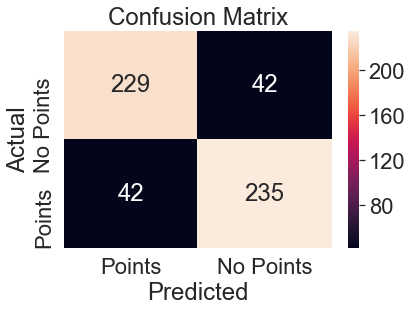

In [46]:
# Use Logistic Regression - using Default Solver and LBfgs with 7000 iteration (no convergence 6000 and below)
#lr_model=LogisticRegression()
lr_model=LogisticRegression(solver='lbfgs', max_iter=9000)
lr_model.fit(X3_train, y3_train)
lr_y3_predict = lr_model.predict(X3_test)
#Results for Logistic Regression
print('Results for Logistic Regression:')
print('Prediction Accuracy:', accuracy_score(y3_test, lr_y3_predict))
print('Confusion Matrix: \n', confusion_matrix(y3_test, lr_y3_predict))
print('Classification Report: \n', classification_report(y3_test, lr_y3_predict))
conf_mat = confusion_matrix(y3_test, lr_y3_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

Iteration 1, loss = 3.51095509
Iteration 2, loss = 0.72986376
Iteration 3, loss = 0.56140246
Iteration 4, loss = 0.49247827
Iteration 5, loss = 0.49144035
Iteration 6, loss = 0.52184996
Iteration 7, loss = 0.43420586
Iteration 8, loss = 0.43949710
Iteration 9, loss = 0.42637327
Iteration 10, loss = 0.41754375
Iteration 11, loss = 0.43182448
Iteration 12, loss = 0.41599433
Iteration 13, loss = 0.42488073
Iteration 14, loss = 0.41929261
Iteration 15, loss = 0.42338308
Iteration 16, loss = 0.41568590
Iteration 17, loss = 0.42609934
Iteration 18, loss = 0.42295691
Iteration 19, loss = 0.40859516
Iteration 20, loss = 0.40875021
Iteration 21, loss = 0.40740734
Iteration 22, loss = 0.41760299
Iteration 23, loss = 0.42175200
Iteration 24, loss = 0.40961495
Iteration 25, loss = 0.40269753
Iteration 26, loss = 0.40801617
Iteration 27, loss = 0.40022804
Iteration 28, loss = 0.40261555
Iteration 29, loss = 0.39877905
Iteration 30, loss = 0.38789623
Iteration 31, loss = 0.40128770
Iteration 32, los

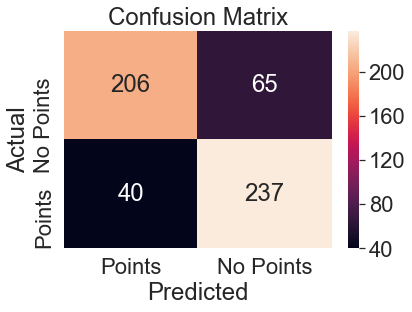

In [50]:
# Using MLP Classifier
#mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_model.fit(X3_train, y3_train)
mlp_y3_predict = mlp_model.predict(X3_test)
# Results for MLP Classifier - Neural Network
print('Results for MLP:')
print('Prediction Accuracy:', accuracy_score(y3_test, mlp_y3_predict))
print('Confusion Matrix: \n', confusion_matrix(y3_test, mlp_y3_predict))
print('Classification Report: \n', classification_report(y3_test, mlp_y3_predict))
conf_mat = confusion_matrix(y3_test, mlp_y3_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

In [51]:
#Run 3 -  Remove Constructor, Circuit & Driver from Features
results_logr_dummy4 = pd.get_dummies(results_logr, columns = (['Weather']))
results_logr_dummy4.head()

,GridStart,TotalLaps,FastestLapTime,FastestLapSpeed,Driver,Circuit,Constructor,QualifyPos,NumPitStops,LastPitStopLap,PitStopTime,SaftetyCarLaps,DriverAge,PointsFinish,Weather_Dry,Weather_Varied,Weather_Wet
0,2,58,90.3,211.382,hamilton,albert_park,mclaren,2,2,36,23.199,0,26,P,1,0,0
1,4,58,89.9,212.396,button,albert_park,mclaren,4,3,37,22.681,0,31,P,1,0,0
2,17,48,91.4,208.861,barrichello,albert_park,williams,17,4,40,26.309,0,38,N,1,0,0
3,18,57,92.4,206.661,heidfeld,albert_park,renault,18,2,30,25.098,0,33,N,1,0,0
4,6,58,90.1,211.969,petrov,albert_park,renault,6,2,36,25.683,0,26,P,1,0,0


In [52]:
features4 = list(results_logr_dummy4)
features4.remove('Driver')
features4.remove('Circuit')
features4.remove('Constructor')
features4.remove('PointsFinish')
X4 = results_logr_dummy4[features4]
y4 = results_logr_dummy4['PointsFinish']
features4

['GridStart',
 'TotalLaps',
 'FastestLapTime',
 'FastestLapSpeed',
 'QualifyPos',
 'NumPitStops',
 'LastPitStopLap',
 'PitStopTime',
 'SaftetyCarLaps',
 'DriverAge',
 'Weather_Dry',
 'Weather_Varied',
 'Weather_Wet']

In [53]:
#Split the Sample as 80% training, 20% test
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [54]:
# Feature Selection Using Recursive Feature Selection
fit_lr_model = LogisticRegression(solver='lbfgs', max_iter=3000) #solver='liblinear')#
rfe = RFE(fit_lr_model, 3)
fit_lr = rfe.fit(X4,y4)
print("Num Features: %s" % (fit_lr.n_features_))
print("Selected Features: %s" % (fit_lr.support_))
print("Feature Ranking: %s" % (fit_lr.ranking_))

Num Features: 3
Selected Features: [ True False False False False False False False False False False  True
  True]
Feature Ranking: [ 1  4  5  6  9  3 10 11  8  7  2  1  1]


Results for Logistic Regression:
Prediction Accuracy: 0.833941605839416
Confusion Matrix: 
 [[229  42]
 [ 49 228]]
Classification Report: 
               precision    recall  f1-score   support

           N       0.82      0.85      0.83       271
           P       0.84      0.82      0.83       277

   micro avg       0.83      0.83      0.83       548
   macro avg       0.83      0.83      0.83       548
weighted avg       0.83      0.83      0.83       548



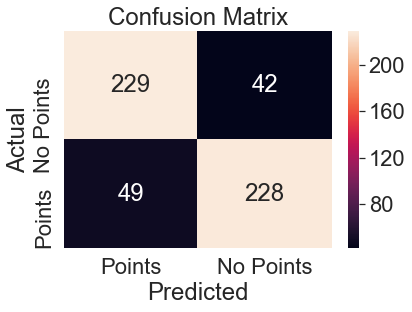

In [55]:
# Use Logistic Regression -
#lr_model=LogisticRegression()
lr_model=LogisticRegression(solver='lbfgs', max_iter=4000)
lr_model.fit(X4_train, y4_train)
lr_y4_predict = lr_model.predict(X4_test)
#Results for Logistic Regression
print('Results for Logistic Regression:')
print('Prediction Accuracy:', accuracy_score(y4_test, lr_y4_predict))
print('Confusion Matrix: \n', confusion_matrix(y4_test, lr_y4_predict))
print('Classification Report: \n', classification_report(y4_test, lr_y4_predict))
conf_mat = confusion_matrix(y4_test, lr_y4_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

Iteration 1, loss = 3.58039265
Iteration 2, loss = 0.66552401
Iteration 3, loss = 0.55956080
Iteration 4, loss = 0.49195364
Iteration 5, loss = 0.45973187
Iteration 6, loss = 0.51312855
Iteration 7, loss = 0.43505625
Iteration 8, loss = 0.41482490
Iteration 9, loss = 0.42116921
Iteration 10, loss = 0.42432087
Iteration 11, loss = 0.42527284
Iteration 12, loss = 0.43195500
Iteration 13, loss = 0.41392368
Iteration 14, loss = 0.41369665
Iteration 15, loss = 0.42597621
Iteration 16, loss = 0.41383913
Iteration 17, loss = 0.41654640
Iteration 18, loss = 0.42857340
Iteration 19, loss = 0.42448657
Iteration 20, loss = 0.40035712
Iteration 21, loss = 0.40275478
Iteration 22, loss = 0.40409873
Iteration 23, loss = 0.39267289
Iteration 24, loss = 0.44056801
Iteration 25, loss = 0.42426480
Iteration 26, loss = 0.41701382
Iteration 27, loss = 0.41314868
Iteration 28, loss = 0.40844110
Iteration 29, loss = 0.40101170
Iteration 30, loss = 0.40483605
Iteration 31, loss = 0.39599493
Iteration 32, los

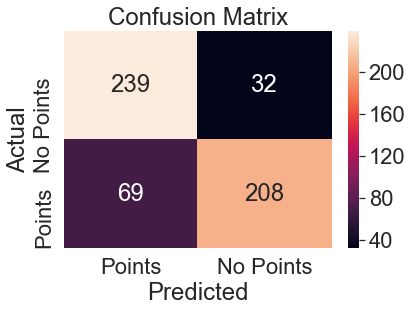

In [59]:
# Using MLP Classifier
#mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_model.fit(X4_train, y4_train)
mlp_y4_predict = mlp_model.predict(X4_test)
# Results for MLP Classifier - Neural Network
print('Results for MLP:')
print('Prediction Accuracy:', accuracy_score(y4_test, mlp_y4_predict))
print('Confusion Matrix: \n', confusion_matrix(y4_test, mlp_y4_predict))
print('Classification Report: \n', classification_report(y4_test, mlp_y4_predict))
conf_mat = confusion_matrix(y4_test, mlp_y4_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

In [60]:
#Run 5 -  Remove Constructor, Circuit, Driver, Weather from Features
results_logr_dummy5 = results_logr
results_logr_dummy5.head()

,GridStart,TotalLaps,FastestLapTime,FastestLapSpeed,Driver,Circuit,Constructor,QualifyPos,NumPitStops,LastPitStopLap,PitStopTime,Weather,SaftetyCarLaps,DriverAge,PointsFinish
0,2,58,90.3,211.382,hamilton,albert_park,mclaren,2,2,36,23.199,Dry,0,26,P
1,4,58,89.9,212.396,button,albert_park,mclaren,4,3,37,22.681,Dry,0,31,P
2,17,48,91.4,208.861,barrichello,albert_park,williams,17,4,40,26.309,Dry,0,38,N
3,18,57,92.4,206.661,heidfeld,albert_park,renault,18,2,30,25.098,Dry,0,33,N
4,6,58,90.1,211.969,petrov,albert_park,renault,6,2,36,25.683,Dry,0,26,P


In [61]:
features5 = list(results_logr_dummy5)
features5.remove('Driver')
features5.remove('Circuit')
features5.remove('Constructor')
features5.remove('Weather')
features5.remove('PointsFinish')
X5 = results_logr_dummy5[features5]
y5 = results_logr_dummy5['PointsFinish']
features5

['GridStart',
 'TotalLaps',
 'FastestLapTime',
 'FastestLapSpeed',
 'QualifyPos',
 'NumPitStops',
 'LastPitStopLap',
 'PitStopTime',
 'SaftetyCarLaps',
 'DriverAge']

In [62]:
#Split the Sample as 80% training, 20% test
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [63]:
# Feature Selection Using Recursive Feature Selection
fit_lr_model = LogisticRegression(solver='lbfgs', max_iter=1000) #solver='liblinear')#
rfe = RFE(fit_lr_model, 3)
fit_lr = rfe.fit(X5,y5)
print("Num Features: %s" % (fit_lr.n_features_))
print("Selected Features: %s" % (fit_lr.support_))
print("Feature Ranking: %s" % (fit_lr.ranking_))

Num Features: 3
Selected Features: [ True  True False False False  True False False False False]
Feature Ranking: [1 1 2 3 6 1 7 8 4 5]


Results for Logistic Regression:
Prediction Accuracy: 0.822992700729927
Confusion Matrix: 
 [[225  46]
 [ 51 226]]
Classification Report: 
               precision    recall  f1-score   support

           N       0.82      0.83      0.82       271
           P       0.83      0.82      0.82       277

   micro avg       0.82      0.82      0.82       548
   macro avg       0.82      0.82      0.82       548
weighted avg       0.82      0.82      0.82       548



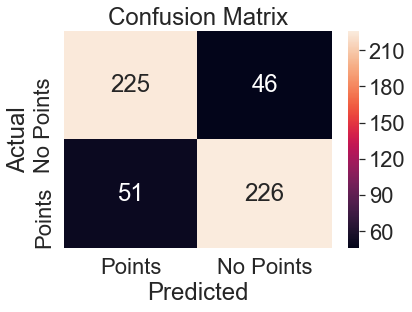

In [64]:
# Use Logistic Regression -
#lr_model=LogisticRegression()
lr_model=LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X5_train, y5_train)
lr_y5_predict = lr_model.predict(X5_test)
#Results for Logistic Regression
print('Results for Logistic Regression:')
print('Prediction Accuracy:', accuracy_score(y5_test, lr_y5_predict))
print('Confusion Matrix: \n', confusion_matrix(y5_test, lr_y5_predict))
print('Classification Report: \n', classification_report(y5_test, lr_y5_predict))
conf_mat = confusion_matrix(y5_test, lr_y5_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);

Iteration 1, loss = 3.36643551
Iteration 2, loss = 0.62207037
Iteration 3, loss = 0.53656537
Iteration 4, loss = 0.47331316
Iteration 5, loss = 0.47729255
Iteration 6, loss = 0.46502839
Iteration 7, loss = 0.45073215
Iteration 8, loss = 0.43761318
Iteration 9, loss = 0.42635468
Iteration 10, loss = 0.42513613
Iteration 11, loss = 0.41145712
Iteration 12, loss = 0.41959211
Iteration 13, loss = 0.42216870
Iteration 14, loss = 0.43889704
Iteration 15, loss = 0.46833530
Iteration 16, loss = 0.41588930
Iteration 17, loss = 0.41172717
Iteration 18, loss = 0.42027981
Iteration 19, loss = 0.42786270
Iteration 20, loss = 0.42070519
Iteration 21, loss = 0.41005638
Iteration 22, loss = 0.41636443
Iteration 23, loss = 0.40969402
Iteration 24, loss = 0.41070730
Iteration 25, loss = 0.41417453
Iteration 26, loss = 0.41617808
Iteration 27, loss = 0.41696600
Iteration 28, loss = 0.41763863
Iteration 29, loss = 0.40978353
Iteration 30, loss = 0.40489682
Iteration 31, loss = 0.41161023
Iteration 32, los

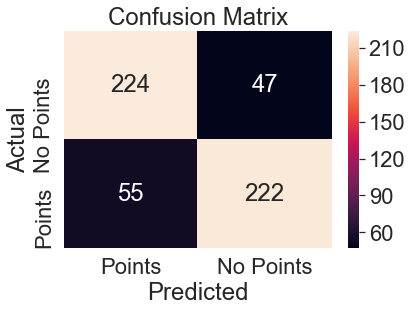

In [68]:
# Using MLP Classifier
#mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_model.fit(X5_train, y5_train)
mlp_y5_predict = mlp_model.predict(X5_test)
# Results for MLP Classifier - Neural Network
print('Results for MLP:')
print('Prediction Accuracy:', accuracy_score(y5_test, mlp_y5_predict))
print('Confusion Matrix: \n', confusion_matrix(y5_test, mlp_y5_predict))
print('Classification Report: \n', classification_report(y5_test, mlp_y5_predict))
conf_mat = confusion_matrix(y5_test, mlp_y5_predict)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, fmt='g');
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Points', 'No Points']); ax.yaxis.set_ticklabels(['No Points', 'Points']);